## Playing with determinants and confusion matrices


In [1]:
import pandas as pd
import numpy as np

In [6]:
detty = np.array([[-2,-1,0], [1,0,-1], [0,1,1]])
det = np.linalg.det(detty)

print(det)

-1.0


     0    1    2    3  Species
0  5.1  3.5  1.4  0.2        0
1  4.9  3.0  1.4  0.2        0
2  4.7  3.2  1.3  0.2        0
3  4.6  3.1  1.5  0.2        0
4  5.0  3.6  1.4  0.2        0
(150, 4)
(150,)
y_test is 
 114    2
62     1
33     0
107    2
7      0
100    2
40     0
86     1
76     1
71     1
134    2
51     1
73     1
54     1
63     1
37     0
78     1
90     1
45     0
16     0
121    2
66     1
24     0
8      0
126    2
22     0
44     0
97     1
93     1
26     0
137    2
84     1
27     0
127    2
132    2
59     1
18     0
83     1
61     1
92     1
112    2
2      0
141    2
43     0
10     0
Name: Species, dtype: int64
y_pred is 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]
The confusion matix is 
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


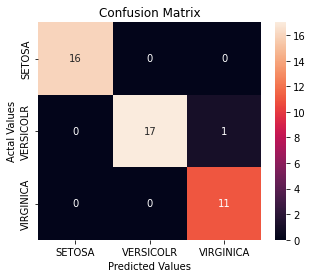

In [15]:
#importing packages

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

#Importing of dataset to dataframe. 

iris = datasets.load_iris()

df = pd.DataFrame(iris.data)
df["Species"] = iris.target

print(df.head())

#Separating independant variable and dependent variable("Species")
X = df.drop(['Species'], axis=1)
y = df['Species']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

clf = SVC(kernel = 'linear').fit(X_train,y_train)
clf.predict(X_train)

#Testing the model using X_test and storing the output in y_pred
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print("y_test is \n", y_test)
print("y_pred is \n", y_pred)
print("The confusion matix is \n", cm)
cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()